# Effect of capillary forces on $V_P$ and $V_S$
Modelled using *Solazzi, S. G., Bodet, L., Holliger, K., & Jougnot, D. (2021). Surface‐Wave Dispersion in Partially Saturated Soils: The Role of Capillary Forces. Journal of Geophysical Research: Solid Earth, e2021JB022074*.

### Load Packages and Routines

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Go to Python folder to import routines
if os.getcwd() != 'C:\\Olivia\\Python': 
    os.chdir('C:\\Olivia\\Python')
print('Current directory: ', os.getcwd())
print('Python folders: ', os.listdir())

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Olivia\\Python'

In [3]:
# Import routines
from EffectiveMedia.GranularModels import HertzMindlin
from Fluid.Gassmann import isoGassmann, fluidWood
from Hydro.hydro_models import Swe_from_wt_VG
from Utils.bounds import HillAvr
from Utils.elastic_param import Vp_from_K_G, Vs_from_G, nu_from_K_G

### Plot parameters

In [4]:
# Plot parameters
plt.rc('axes',labelsize=16)
plt.rc('font',size=14)
plt.rc('xtick',labelsize='medium')
plt.rc('ytick',labelsize='medium')

### Input parameters

Input parameters are listed in Table 1. The Kaolinite and Quartz fractions are given in the text (Section 3.2).

In [5]:
phi = 0.38           #Porosity - Table 1
f_Gc = 0.43          #Gulf  fraction - section 3.2
f_Qz = 0.57          #Quartz fraction - section 3.2
C = 8                #Coordination number - table 1
FC = 0.3             #Friction coefficient - table 1
Swr = 0.26           #Residual water saturation - table 1
n_vg = 1.23          #Pore size distribution parameter - table 1
alpha_vg = 0.027*1e2 #Inverse of pore entry pressure - table 1 - 1/m

input_df = pd.DataFrame(columns = ['Sandy Clay'],
                        index  = ['phi', 'f_Gc', 'f_Qz', 'C', 'FC', 'Swr', 'n_vg', 'alpha_vg'],
                        data = [phi, f_Gc, f_Qz, C, FC, Swr, n_vg, alpha_vg])
input_df

,Sandy Clay
phi,0.38
f_Gc,0.43
f_Qz,0.57
C,8.00
FC,0.30
Swr,0.26
n_vg,1.23
alpha_vg,2.70


Mineral properties are given in Table 2.

In [6]:
# Mineral properties
K_Qz = 45     #GPa
G_Qz = 36     #GPa
rho_Qz = 2.6  #g/cc
K_Gc = 7      #GPa
G_Gc = 25     #GPa
rho_Gc = 2.55 #g/cc

Fuild properties are given in Table2.

In [7]:
# Fluid properties
Kw = 2.3    #GPa
rho_w = 1.0  #g/cc
Ka = 1e-4   #GPa
rho_a = 1e-3 #g/cc

The Earth's gravitational acceleration is used to calculate the pressure (given in Section 2.2.2).

In [8]:
# Earth’s gravitational acceleration 
g = 9.806 #m.s^-2

The water table depth is given in Section 3.2.

In [9]:
# Water table depth
wt = 25  #m - section 3.1

### Load results from Solazzi et al. (2021)

Data from Solazzi et al. (2021) was downloaded from the link provided in Solazzi et al. (2021) article: https://doi.org/10.5281/zenodo.5266459.

In [10]:
# Go to biblio folder to load data
if os.getcwd() != ('C:/Olivia/Data/Surface Wave/Solazzi_et_al_2021/data_fig_4_5_6'):
    os.chdir('C:/Olivia/Data/Surface Wave/Solazzi_et_al_2021/data_fig_4_5_6')

In [11]:
# Model2: model that does not account for suction effects
solazzi_prop_model2_df = pd.read_csv('sandyclay_WT25_prop_model2.txt', skiprows=2, sep=' ') 
# Manipulate df to get proper column name for depth (z[m] instead of #)
col_names = list(solazzi_prop_model2_df.columns)
col_names.remove('#')
solazzi_prop_model2_df.dropna(axis=1,inplace=True)
solazzi_prop_model2_df.columns = col_names
solazzi_prop_model2_df

,z[m],Sw[],rho_b[kg/m3],VP[m/s],VS[m/s]
0,-0.000,0.543,1813.002,17.901,0.000
1,-0.003,0.543,1813.006,146.605,91.476
2,-0.007,0.543,1813.009,164.305,102.678
3,-0.010,0.543,1813.012,175.660,109.856
4,-0.013,0.543,1813.015,184.200,115.252
...,...,...,...,...,...
11995,-39.983,1.000,1986.668,1763.024,424.522
11996,-39.987,1.000,1986.668,1763.027,424.528
11997,-39.990,1.000,1986.668,1763.030,424.534
11998,-39.993,1.000,1986.668,1763.033,424.540


In [12]:
# Model3: model that accounts for suction effects
solazzi_prop_model3_df = pd.read_csv('sandyclay_WT25_prop_model3.txt', skiprows=2, sep=' ') 
# Manipulate df to get proper column name for depth (z[m] instead of #)
col_names = list(solazzi_prop_model3_df.columns)
col_names.remove('#')
solazzi_prop_model3_df.dropna(axis=1,inplace=True)
solazzi_prop_model3_df.columns = col_names
solazzi_prop_model3_df

,z[m],Sw[],rho_b[kg/m3],VP[m/s],VS[m/s]
0,-0.000,0.543,1813.002,496.349,311.834
1,-0.003,0.543,1813.006,496.393,311.862
2,-0.007,0.543,1813.009,496.437,311.889
3,-0.010,0.543,1813.012,496.480,311.917
4,-0.013,0.543,1813.015,496.524,311.944
...,...,...,...,...,...
11995,-39.983,1.000,1986.668,1763.024,424.522
11996,-39.987,1.000,1986.668,1763.027,424.528
11997,-39.990,1.000,1986.668,1763.030,424.534
11998,-39.993,1.000,1986.668,1763.033,424.540


### Saturation profile

First, we calculate the saturation profile $S_w$ using van Genutchen model to relate $S_{we}$ to the water table depth (see also Zyserman et al., 2017). This involves knowing:
- the residual water saturation $S_{wr}$;
- the water table depth $wt$;
- the inverse of the pore entry pressure $\alpha_{vg}$;
- the pore size distribution parameter $n_{vg}$.

In [13]:
z = np.linspace(0, 40, 100)

In [14]:
# Swe = np.ones(len(z))
# I = np.where(z<=wt)
# m_vg = 1-1/n_vg # pore size distribution parameter (unitless)
# for i in I[0]:
#     Swe[i] = (1+(alpha_vg*(wt-z[i]))**n_vg)**(-m_vg) #Eq.16
# Sw = Swe*(1-Swr)+Swr #See discussion after Eq.8

In [15]:
# Swe = np.ones(len(z))
# I = np.where(z<=wt)
# m_vg = 1-1/n_vg # pore size distribution parameter (unitless)
# Swe[I] = (1+(alpha_vg*(wt-z[I]))**n_vg)**(-m_vg) #Eq.16
# Sw = Swe*(1-Swr)+Swr #See discussion after Eq.8

In [16]:
Swe = Swe_from_wt_VG(z, wt, alpha_vg, n_vg)
Sw = Swe*(1-Swr)+Swr #See discussion after Eq.8

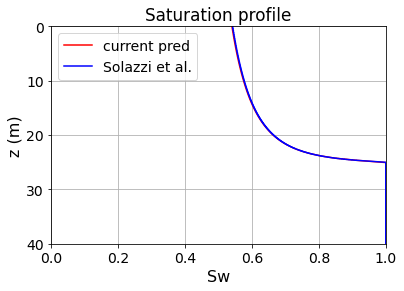

In [17]:
fig, ax = plt.subplots()
ax.plot(Sw,z,'r',label='current pred')
ax.plot(solazzi_prop_model3_df['Sw[]'].values, -solazzi_prop_model3_df['z[m]'], 
        'b', label='Solazzi et al.')
ax.set(xlabel='Sw', xlim=[0.,1.],
       ylabel='z (m)', ylim=[40,0],
       title='Saturation profile')
ax.legend()
ax.grid()

### Bulk density profile

Using the saturation profile, we know calculate the bulk density profile, knowing the mineral and fluid properties.

In [18]:
# Fluid density
rho_f = Sw*rho_w + (1-Sw)*rho_a #g/cc
# Grain density
rho_s = rho_Qz*f_Qz + (1-f_Qz)*rho_Gc #g/cc
# Bulk density
rho_sat = rho_s*(1-phi) + rho_f*phi #g/cc

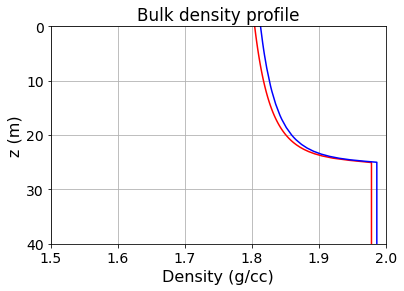

In [19]:
fig, ax = plt.subplots()
ax.plot(rho_sat, z, 'r')
ax.plot(solazzi_prop_model3_df['rho_b[kg/m3]'].values*1e-3, -solazzi_prop_model3_df['z[m]'], 'b')
ax.set(xlabel='Density (g/cc)', xlim=[1.5, 2.0],
       ylabel='z (m)', ylim=[40,0],
       title='Bulk density profile')
ax.grid()

> **Note :** Small inconsistancy between current code and Solazzi et al. (2021) paper. This may be due to the fact that Solazzi et al. (2021) may be introducing a silt fraction (wclay = 0.43; wsilt = 0.05; wsand = 0.52;) as specified in *README_data_fig_4_5_6.txt*.

### Velocity profiles

In [20]:
# Grain properties
Ks = HillAvr(K_Qz, f_Qz, K_Gc) #GPa
Gs = HillAvr(G_Qz, f_Qz, G_Gc) #GPa

In [21]:
# Fluid properties
Kf = fluidWood(Sw, Kw, Ka) #GPa

In [22]:
# Effective pressure without capillary effects
prod_rhoDepth_min = np.zeros(np.shape(rho_sat))
P = np.zeros(np.shape(rho_sat))
for i_depth in range(1,len(rho_sat)):
    prod_rhoDepth_min[i_depth] = rho_sat[i_depth-1]*1e3*abs(z[i_depth]-z[i_depth-1])
    P[i_depth] = np.sum(prod_rhoDepth_min[0:i_depth])*g
#P = rho_sat*1e3*g*z #Old: before 28/10/2022
P *= 1e-6 # conversion Pa -> MPa

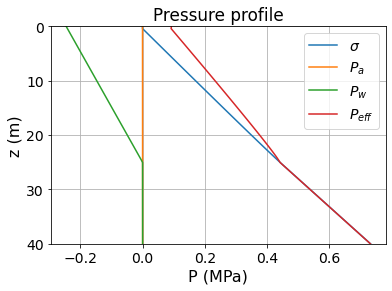

In [23]:
# Effective pressure with capillary effects
# #-- Option 1: computing Pa and Pw from air and water density
# Pa = (rho_a*1e3*g*z)*1e-6  #MPa 
# Pw = (rho_w*1e3*g*z)*1e-6  #MPa 
# Peff = P - Pa*(1-Swe) - Pw*Swe #MPa

#-- Option 2: same workflow as fig3
m_vg = 1-1/n_vg # pore size distribution parameter (unitless)
h = -((Swe**(-1/m_vg)-1)/alpha_vg**(n_vg))**(1/n_vg) # hydraulic pressure head (m)
Pa = (rho_a*1e3*g*z)*1e-6  #MPa 
Pc = (-h*rho_w*1e3*g)*1e-6 #MPa
Pw = Pa - Pc
Peff = P - Pa + Pc*Swe

fig, ax = plt.subplots()
ax.plot(P, z, label='$\sigma$')
ax.plot(Pa, z, label='$P_a$')
ax.plot(Pw, z, label='$P_w$')
ax.plot(Peff, z, label='$P_{eff}$')
ax.set(xlabel='P (MPa)',
       ylabel='z (m)', ylim=[40,0],
       title='Pressure profile')
ax.legend()
ax.grid()

In [24]:
# Drained properties
Kdr, Gdr = HertzMindlin(Ks, Gs, P, phi=phi, C=C, FC=FC)        #without capillary effects
Kdr_c, Gdr_c = HertzMindlin(Ks, Gs, Peff, phi=phi, C=C, FC=FC) #with capillary effects

In [25]:
# Saturated properties
# -- without capillary effects
Ksat = isoGassmann(Kdr, Gdr, Ks, Kf, phi)
Vp_sat = Vp_from_K_G(Ksat, Gdr, rho_sat)
Vs_sat = Vs_from_G(Gdr, rho_sat)
# -- with capillary effects
Ksat_c = isoGassmann(Kdr_c, Gdr_c, Ks, Kf, phi)
Vp_sat_c = Vp_from_K_G(Ksat_c, Gdr_c, rho_sat)
Vs_sat_c = Vs_from_G(Gdr_c, rho_sat)

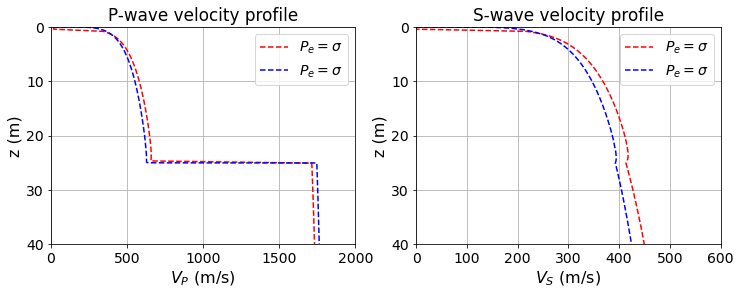

In [26]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(Vp_sat*1e3, z, 
            'r--', label='$P_e=\sigma$')
# axs[0].plot(Vp_sat_c*1e3, z, 
#             'r', label='$P_e=\sigma - P_a + \chi P_c$')
axs[0].plot(solazzi_prop_model2_df['VP[m/s]'].values, -solazzi_prop_model2_df['z[m]'], 
        'b--', label='$P_e=\sigma$')
# axs[0].plot(solazzi_prop_model3_df['VP[m/s]'].values, -solazzi_prop_model3_df['z[m]'], 
#         'b', label='$P_e=\sigma - P_a + \chi P_c$')
axs[0].set(xlabel='$V_P$ (m/s)', xlim=[0, 2000],
           title='P-wave velocity profile')
axs[1].plot(Vs_sat*1e3, z, 
           'r--', label='$P_e=\sigma$')
# axs[1].plot(Vs_sat_c*1e3, z,
#            'r', label='$P_e=\sigma - P_a + \chi P_c$')
axs[1].plot(solazzi_prop_model2_df['VS[m/s]'].values, -solazzi_prop_model2_df['z[m]'], 
        'b--', label='$P_e=\sigma$')
# axs[1].plot(solazzi_prop_model3_df['VS[m/s]'].values, -solazzi_prop_model3_df['z[m]'], 
#         'b', label='$P_e=\sigma - P_a + \chi P_c$')
axs[1].set(xlabel='$V_S$ (m/s)', xlim=[0, 600],
           title='S-wave velocity profile')
for i in range(0,2):
    axs[i].set(ylabel='z (m)', ylim=[40,0])
    axs[i].grid()
    axs[i].legend()

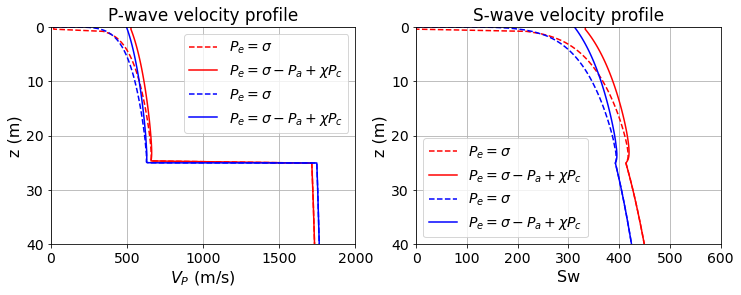

In [27]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(Vp_sat*1e3, z, 
            'r--', label='$P_e=\sigma$')
axs[0].plot(Vp_sat_c*1e3, z, 
            'r', label='$P_e=\sigma - P_a + \chi P_c$')
axs[0].plot(solazzi_prop_model2_df['VP[m/s]'].values, -solazzi_prop_model2_df['z[m]'], 
        'b--', label='$P_e=\sigma$')
axs[0].plot(solazzi_prop_model3_df['VP[m/s]'].values, -solazzi_prop_model3_df['z[m]'], 
        'b', label='$P_e=\sigma - P_a + \chi P_c$')
axs[0].set(xlabel='$V_P$ (m/s)', xlim=[0, 2000],
           title='P-wave velocity profile')
axs[1].plot(Vs_sat*1e3, z, 
           'r--', label='$P_e=\sigma$')
axs[1].plot(Vs_sat_c*1e3, z,
           'r', label='$P_e=\sigma - P_a + \chi P_c$')
axs[1].plot(solazzi_prop_model2_df['VS[m/s]'].values, -solazzi_prop_model2_df['z[m]'], 
        'b--', label='$P_e=\sigma$')
axs[1].plot(solazzi_prop_model3_df['VS[m/s]'].values, -solazzi_prop_model3_df['z[m]'], 
        'b', label='$P_e=\sigma - P_a + \chi P_c$')
axs[1].set(xlabel='Sw', xlim=[0, 600],
           title='S-wave velocity profile')
for i in range(0,2):
    axs[i].set(ylabel='z (m)', ylim=[40,0])
    axs[i].grid()
    axs[i].legend()

> *Note*: Vp, Vs don't start at 0 for case taking capillary pressure into account (check how it is computed).

### Poisson ratio profile

In [28]:
nu_sat = nu_from_K_G(Ksat, Gdr)
nu_sat_c = nu_from_K_G(Ksat_c, Gdr_c)

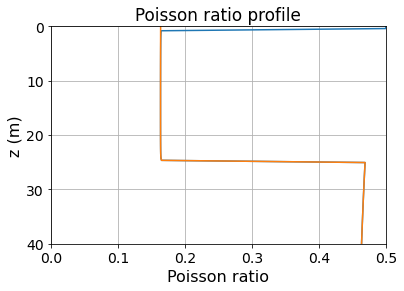

In [29]:
fig, ax = plt.subplots()
ax.plot(nu_sat, z, label='$P_e=\sigma$')
ax.plot(nu_sat_c, z, label='$P_e=\sigma - P_a + \chi P_c$')
ax.set(xlabel='Poisson ratio', xlim=[0., 0.5],
       ylabel='z (m)', ylim=[40,0],
       title='Poisson ratio profile')
ax.grid()

### Wave travel times

In [30]:
tp = 

SyntaxError: invalid syntax (<ipython-input-30-f161547ef4b4>, line 1)